# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Generate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Guide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Guide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/GuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.
> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 

Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [ ]:
# regex for extracting exactly 4 digits
regex = r"\b\d{4}\b"
# regex to match words starting with "super"
regex = r"\bsuper\w*"

regex = r"\[\[([^|\]]+)(?:\|[^]]+)?\]\]"

# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [124]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Load rapper names

In [7]:
# url = "https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians"
# response = requests.get(url)
# html = response.content
# soup = BeautifulSoup(html, "html.parser")

# # extract the names of all musicians the lists are under mw-category-group class
# musicians = []
# for div in soup.find_all("div", class_="mw-category-group"):
#     for li in div.find_all("li"):
#         musicians.append(li.text)
# print(musicians)

base_url = "https://en.wikipedia.org/wiki/"

In [32]:
west_coast_rappers = pd.read_csv(r'C:\Users\staur\Desktop\social_graphs\socialgraphs2023\files\WestCoastRappers.csv')
east_coast_rappers = pd.read_csv(r'C:\Users\staur\Desktop\social_graphs\socialgraphs2023\files\EastCoastRappers.csv')

# trim WikipediaPageName column and replace space with underscore
west_coast_rappers["WikipediaPageName"] = west_coast_rappers["WikipediaPageName"].apply(lambda x: x.strip().replace(" ", "_"))
east_coast_rappers["WikipediaPageName"] = east_coast_rappers["WikipediaPageName"].apply(lambda x: x.strip().replace(" ", "_"))


#### Download pages

In [70]:
rapper = ""
base_url = "https://en.wikipedia.org/w/api.php?"
params = {
    "action": "query",
    "prop": "revisions",
    "rvprop": "content",
    "format": "json",
    "titles": rapper
}

In [76]:
rapper = "50_Cent"
params["titles"] = rapper
wikitext = requests.get(base_url, params=params)    
wikijson = wikitext.json()

In [106]:
# download the html for each rapper
for index, row in west_coast_rappers.iterrows():
    rapper = row["WikipediaPageName"]
    params["titles"] = rapper
    wikitext = requests.get(base_url, params=params)    
    wikijson = wikitext.json()
    # store content in df column
    wiki_page_id = list(wikijson["query"]["pages"].keys())[0]
    content = wikijson["query"]["pages"][wiki_page_id]["revisions"][0]['*']
    west_coast_rappers.loc[index, "page_content"] = str(content)

for index, row in east_coast_rappers.iterrows():
    rapper = row["WikipediaPageName"]
    params["titles"] = rapper
    wikitext = requests.get(base_url, params=params)    
    wikijson = wikitext.json()
    # store content in df column
    wiki_page_id = list(wikijson["query"]["pages"].keys())[0]
    content = wikijson["query"]["pages"][wiki_page_id]["revisions"][0]['*']
    east_coast_rappers.loc[index, "page_content"] = str(content)

# store data in csv files
west_coast_rappers.to_csv(r'C:\Users\staur\Desktop\social_graphs\socialgraphs2023\files\west_coast_rappers_with_html.csv')
east_coast_rappers.to_csv(r'C:\Users\staur\Desktop\social_graphs\socialgraphs2023\files\east_coast_rappers_with_html.csv')

C:\Users\staur\AppData\Local\Temp\ipykernel_23888\3834793657.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{{short description|American rapper from California (born 1987)}}
{{Infobox musical artist
| name            = 03 Greedo
| birth_name      = Jason Jamal Jackson
| birth_date      = {{Birth date and age|mf=yes|1987|7|26}}
| alias           = Greedy Giddy
| birth_place     = [[Los Angeles]], [[California]], [[U.S.]]<ref name="complex interview">{{cite web|url=http://www.complex.com/music/2018/03/03-greedo-wolf-of-grape-street-interview
|title=03 Greedo Raps More—and Better—Than You|publisher=Complex |date=2018-03-09|access-date=2018-04-22}}</ref>
| genre           = {{hlist|[[West Coast hip hop|West Coast hip-hop]]|[[Trap music (hip hop)|trap]]|[[Hip hop music|hip hop]]}}
| occupation      = {{hlist|Rapper|singer|songwriter|producer}}
| instrument      = {{hlist|Vocals}}
| years_active    = 2010–present
|

---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0


> 
> _Exercise_: Build the network of rappers 

> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.


In [208]:
regex = r"\[\[(.*?)\]\]"
west_coast_rappers_v = west_coast_rappers["WikipediaPageName"].values
east_coast_rappers_v = east_coast_rappers["WikipediaPageName"].values
rapper_connections_dict = {}
for rapper in west_coast_rappers_v:
    rapper_connections_dict[rapper] = []
for rapper in east_coast_rappers_v:
    rapper_connections_dict[rapper] = []

for index, row in west_coast_rappers.iterrows():
    # extract links from html
    html = row["page_content"]
    links = re.findall(regex, html)
    for link in links:
        link = link.split("|")[0].replace(" ", "_")
        # check if main_part is in dataframe["WikipediaPageName"].values
        if link in west_coast_rappers["WikipediaPageName"].values \
        or link in east_coast_rappers["WikipediaPageName"].values:
            rapper_connections_dict[row["WikipediaPageName"]].append(link)

for index, row in east_coast_rappers.iterrows():
    # extract links from html
    html = row["page_content"]
    links = re.findall(regex, html)
    for link in links:
        link = link.split("|")[0].replace(" ", "_")
        # check if main_part is in dataframe["WikipediaPageName"].values
        if link in west_coast_rappers["WikipediaPageName"].values \
        or link in east_coast_rappers["WikipediaPageName"].values:
            rapper_connections_dict[row["WikipediaPageName"]].append(link)

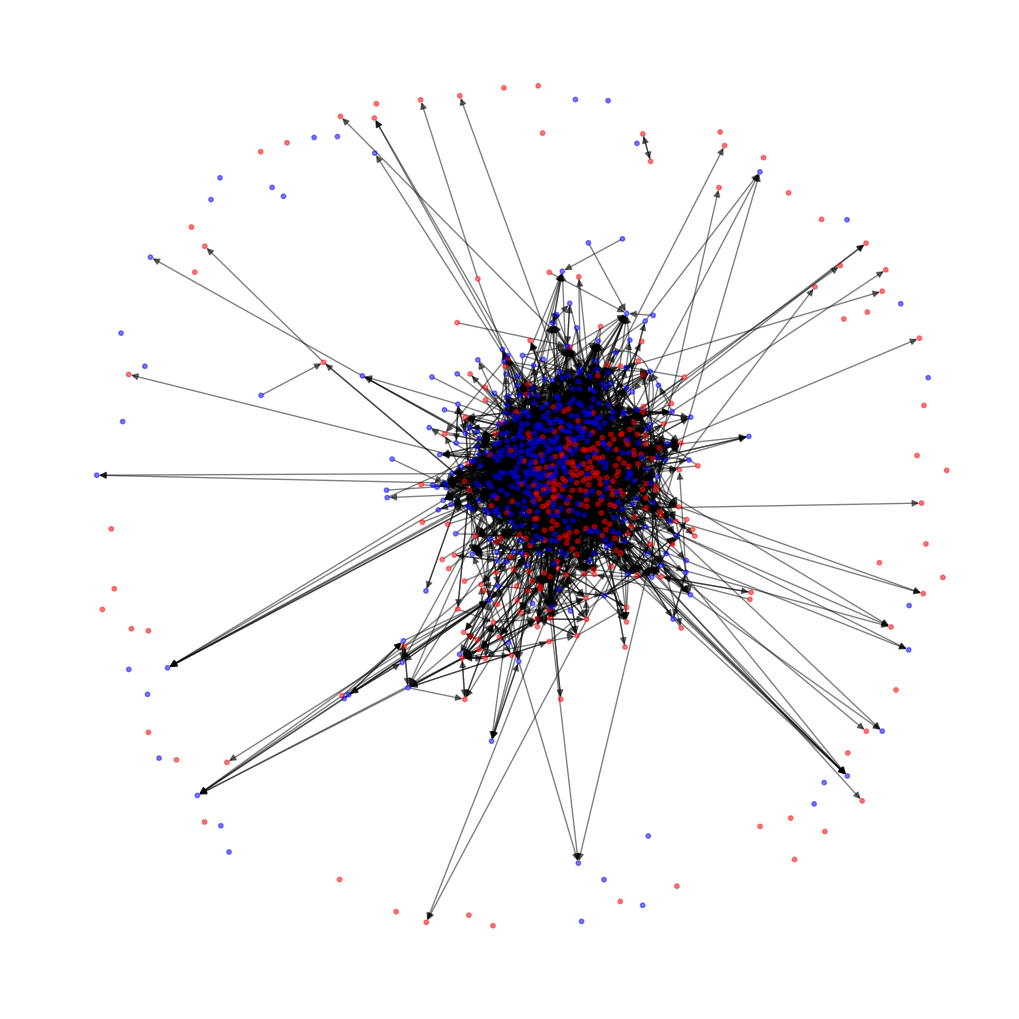

In [209]:
# create a directed graph
G = nx.DiGraph()

# add nodes
for key in west_coast_rappers_v:
    G.add_node(key, coast="west", color="red")
for key in east_coast_rappers_v:
    G.add_node(key, coast="east", color="blue")

for key, values in rapper_connections_dict.items():
    for value in values:
        G.add_edge(key, value)

# plot the graph with colors
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, node_size=10, alpha=0.5, node_color=nx.get_node_attributes(G, 'color').values())
plt.show()


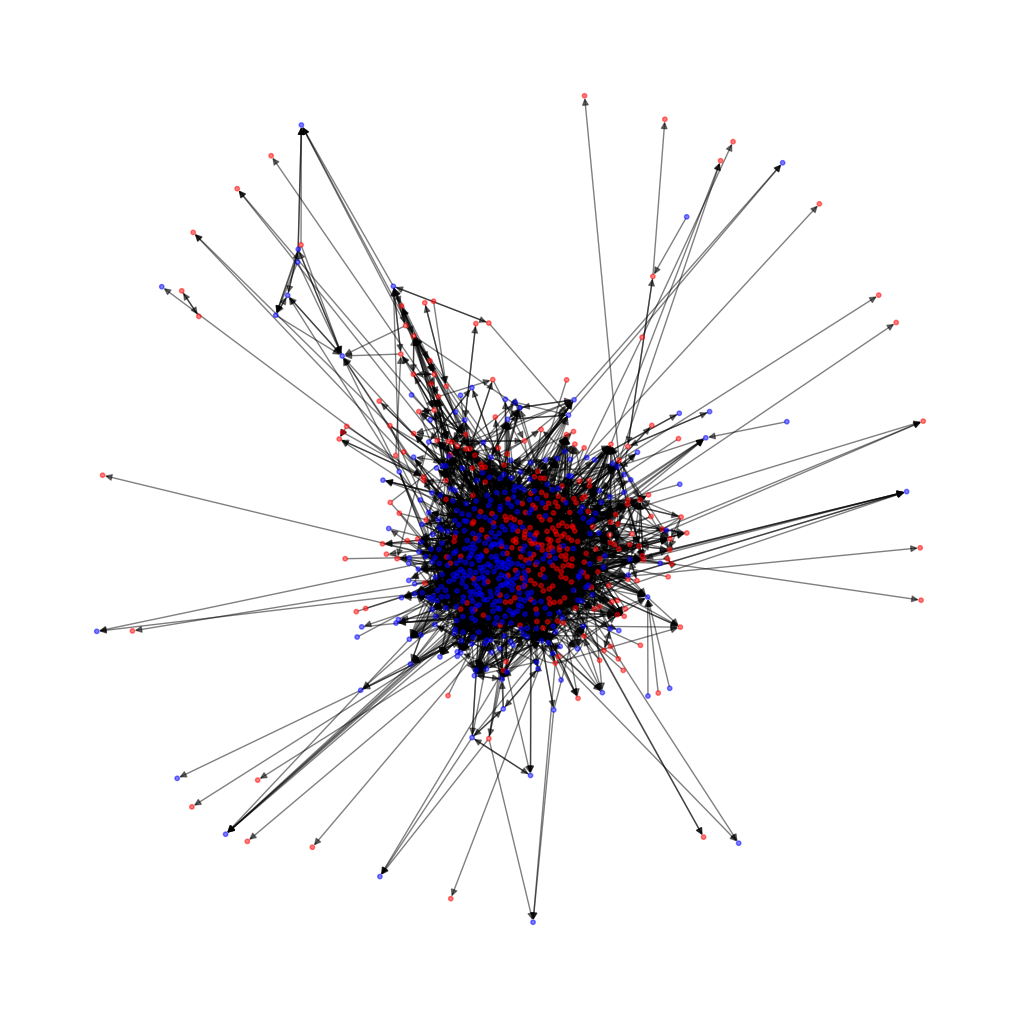

In [210]:
# find nodes with degree 0
# degree_dict = dict(G.degree(G.nodes()))
# # drop nodes with degree 0
# for key, value in degree_dict.items():
#     if value == 0:
#         G.remove_node(key)

for node in list(G.nodes()):
    if G.degree(node) == 0:
        #print(node)
        G.remove_node(node)

# plot the graph with colors
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, node_size=10, alpha=0.5, node_color=nx.get_node_attributes(G, 'color').values())
plt.show()



> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?
> * What is the number of links connecting West coast and East coast? What do those links mean?
> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.
> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

Total nodes: 731
Total edges: 5814
Total edges between east and west coast: 1262


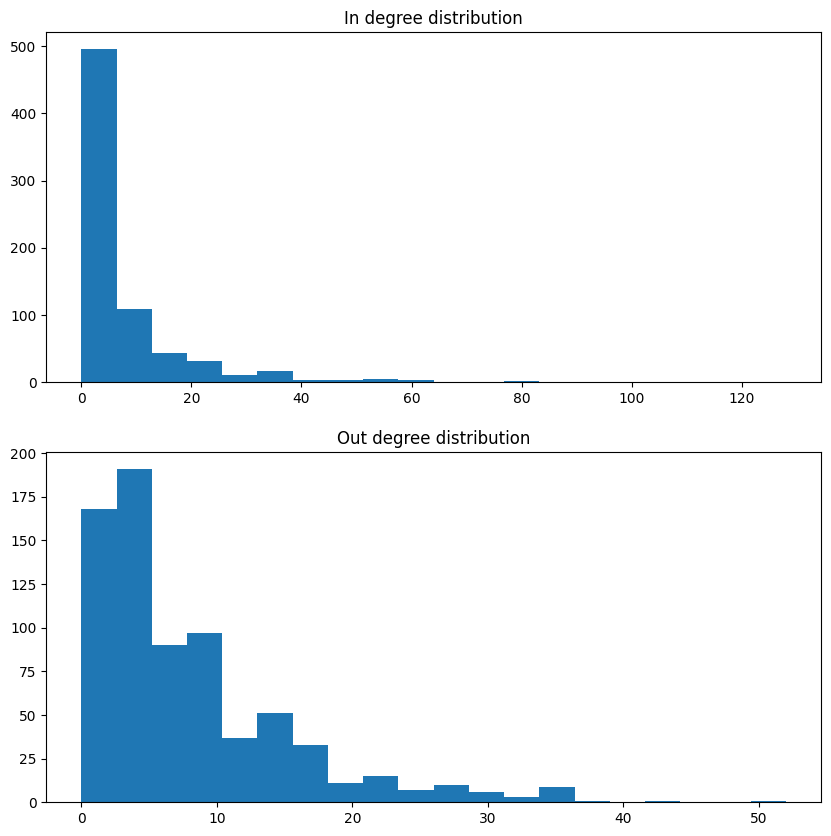

In [212]:
# total nodes
print("Total nodes:", len(G.nodes()))

# total edges
print("Total edges:", len(G.edges()))

# count edges between east and west coast
east_west_edges = 0
for edge in G.edges():
    if G.nodes[edge[0]]["coast"] != G.nodes[edge[1]]["coast"]:
        east_west_edges += 1
print("Total edges between east and west coast:", east_west_edges)

# calculate the in and out degree for each node
in_degree_dict = dict(G.in_degree(G.nodes()))
out_degree_dict = dict(G.out_degree(G.nodes()))

# plot the in and out degree distribution 
# and  the log-log plot of the same in subplots
# in a 2x2 grid
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.hist(list(in_degree_dict.values()), bins=20)
plt.title("In degree distribution")
# plt.subplot(2,2,2)
# plt.loglog(list(in_degree_dict.values()), list(in_degree_dict.values()), "ro")
# plt.title("Log-log plot of in degree")
plt.subplot(2,1,2)
plt.hist(list(out_degree_dict.values()), bins=20)
plt.title("Out degree distribution")
plt.show()

# hist, bins = np.histogram(list(in_degree_dict.values()), bins=10)

# bins =  0.5*(bins[1:] + bins[:-1])

# plt.bar(bins, hist, width=bins[1]-bins[0], color='b')
# plt.show()

# plt.hist(in_degree_dict.values(), bins=10, color='r',alpha=0.4)
# plt.show()


> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.

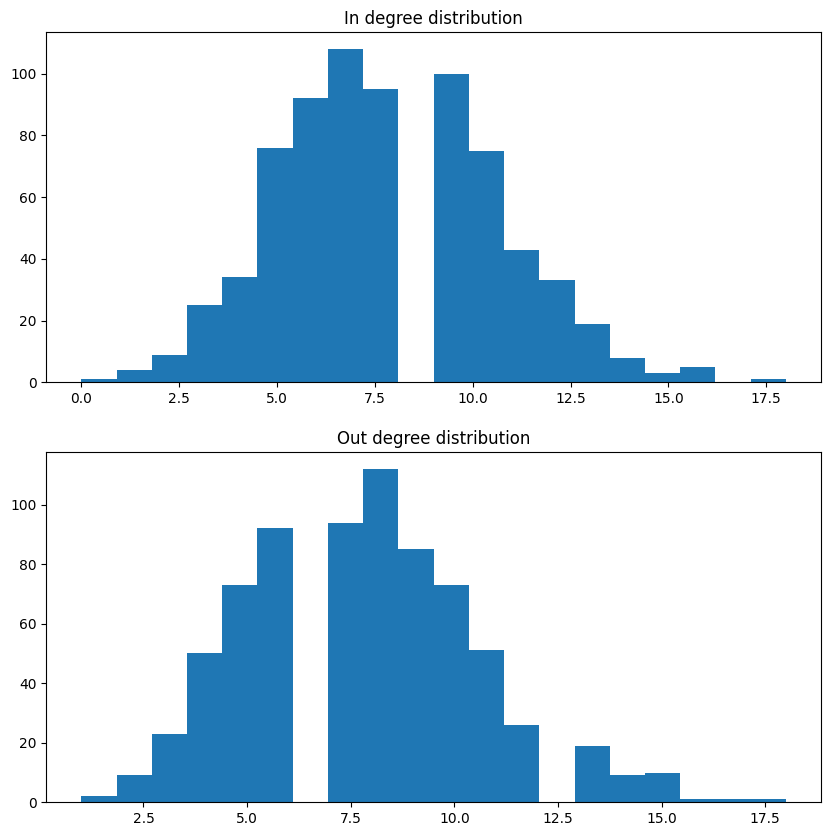

In [213]:
# random graph
p = len(G.edges()) / (len(G.nodes()) * (len(G.nodes()) - 1))
G_random = nx.gnp_random_graph(len(G.nodes()), p, directed=True)

# caluclate the in and out degree for each node
in_degree_dict_G_random = dict(G_random.in_degree(G_random.nodes()))
out_degree_dict_G_random = dict(G_random.out_degree(G_random.nodes()))

# plot the in and out degree distribution
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.hist(list(in_degree_dict_G_random.values()), bins=20)
plt.title("In degree distribution")
plt.subplot(2,1,2)
plt.hist(list(out_degree_dict_G_random.values()), bins=20)
plt.title("Out degree distribution")
plt.show()


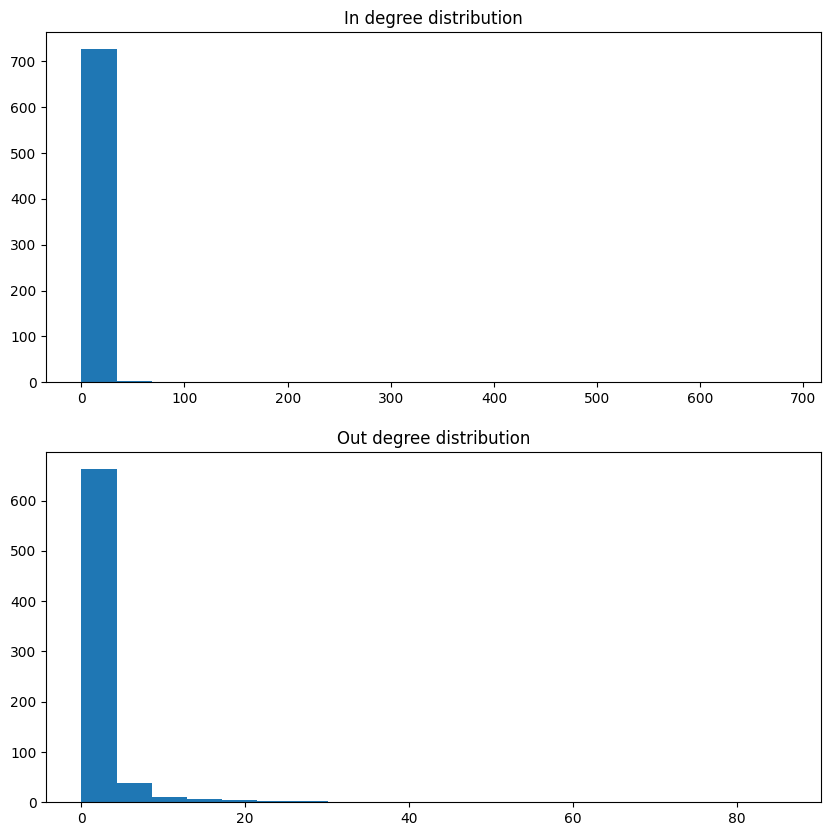

In [214]:
# create a scale free network
G_scale_free = nx.scale_free_graph(len(G.nodes()))

# caluclate the in and out degree for each node
in_degree_dict_G_scale_free = dict(G_scale_free.in_degree(G_scale_free.nodes()))
out_degree_dict_G_scale_free = dict(G_scale_free.out_degree(G_scale_free.nodes()))

# plot the in and out degree distribution
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.hist(list(in_degree_dict_G_scale_free.values()), bins=20)
plt.title("In degree distribution")
plt.subplot(2,1,2)
plt.hist(list(out_degree_dict_G_scale_free.values()), bins=20)
plt.title("Out degree distribution")
plt.show()


> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?


In [218]:
k = 10
sorted_in_degree_dict = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)

print("Top {} nodes with highest in degree:".format(k))
for i in range(k):
    print(sorted_in_degree_dict[i])

sorted_out_degree_dict = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)
print("Top {} nodes with highest out degree:".format(k))
for i in range(k):
    print(sorted_out_degree_dict[i])
    

Top 10 nodes with highest in degree:
('Snoop_Dogg', 128)
('Jay-Z', 116)
('Nas', 98)
('50_Cent', 92)
('Busta_Rhymes', 82)
('Dr._Dre', 81)
('Kendrick_Lamar', 76)
('Tupac_Shakur', 70)
('The_Notorious_B.I.G.', 63)
('E-40', 60)
Top 10 nodes with highest out degree:
('Drag-On', 52)
('Black_Thought', 42)
('DJ_Dahi', 38)
('Dr._Dre', 36)
('The_Game_(rapper)', 36)
('Kendrick_Lamar', 36)
('Kurupt', 35)
('Jahlil_Beats', 35)
('MC_Lyte', 35)
('Uncle_Murda', 34)


> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

In [233]:
sorted_in_degree_dict = sorted(in_degree_dict.items(), key=lambda x: x[1], reverse=True)
top_k = 5
top_west_k = 5
top_east_k = 5
top_k_in_west = []
top_k_in_east = []


for rapper, degree in sorted_in_degree_dict:
    if top_west_k > 0 and G.nodes[rapper]["coast"] == "west":
        top_k_in_west.append(rapper)
        top_west_k -= 1

    if top_east_k > 0 and G.nodes[rapper]["coast"] == "east":
        top_k_in_east.append(rapper)
        top_east_k -= 1
    
    if top_west_k == 0 and top_east_k == 0:
        break

print("Top {} nodes with highest in degree in west coast:".format(top_k))
for i in range(top_k):
    print(top_k_in_west[i])

print("Top {} nodes with highest in degree in east coast:".format(top_k))
for i in range(top_k):
    print(top_k_in_east[i])


top_west_k = 5
top_east_k = 5

sorted_out_degree_dict = sorted(out_degree_dict.items(), key=lambda x: x[1], reverse=True)
top_k_out_west = []
top_k_out_east = []
for rapper, degree in sorted_out_degree_dict:
    if top_west_k > 0 and G.nodes[rapper]["coast"] == "west":
        top_k_out_west.append(rapper)
        top_west_k -= 1

    if top_east_k > 0 and G.nodes[rapper]["coast"] == "east":
        top_k_out_east.append(rapper)
        top_east_k -= 1
    
    if top_west_k == 0 and top_east_k == 0:
        break

print("Top {} nodes with highest out degree in west coast:".format(top_k))
for i in range(top_k):
    print(top_k_out_west[i])

print("Top {} nodes with highest out degree in east coast:".format(top_k))
for i in range(top_k):
    print(top_k_out_east[i])



Top 5 nodes with highest in degree in west coast:
Snoop_Dogg
Dr._Dre
Kendrick_Lamar
Tupac_Shakur
E-40
Top 5 nodes with highest in degree in east coast:
Jay-Z
Nas
50_Cent
Busta_Rhymes
The_Notorious_B.I.G.
Top 5 nodes with highest out degree in west coast:
DJ_Dahi
Dr._Dre
The_Game_(rapper)
Kendrick_Lamar
Kurupt
Top 5 nodes with highest out degree in east coast:
Drag-On
Black_Thought
Jahlil_Beats
MC_Lyte
Uncle_Murda


In [221]:
G.nodes("50_Cent")

NodeDataView({'03_Greedo': None, '24kGoldn': None, '40_Glocc': None, 'DJ_A-Tron': None, 'Ab-Soul': None, 'Abstract_Rude': None, 'Aceyalone': None, 'Afroman': None, 'Ahmad_(rapper)': None, "Ak'Sent": None, 'The_Alchemist_(musician)': None, 'AMG_(rapper)': None, 'Aminé_(rapper)': None, 'Antwon': None, 'B-Legit': None, 'B-Real': None, 'B.G._Knocc_Out': None, 'Show_Banga': None, 'Ant_Banks': None, 'Sho_Baraka': None, 'Becky_G': None, 'Beeda_Weeda': None, 'Beefy_(rapper)': None, 'Berner_(rapper)': None, 'Big_B_(rapper)': None, 'Big_Dave_(rapper)': None, 'Big_Ed_(rapper)': None, 'Big_Fase_100': None, 'Bizzle': None, 'Aloe_Blacc': None, 'Guerilla_Black': None, 'Nissim_Black': None, 'Toni_Blackman': None, 'Blueface': None, 'Blxst': None, 'Bones_(rapper)': None, 'Braille_(musician)': None, 'Buddy_(rapper)': None, 'Busdriver': None, 'Scott_Caan': None, 'Sway_Calloway': None, 'Nick_Cannon': None, "Captain_Save_'Em": None, 'Clyde_Carson': None, 'Celestaphone': None, 'DJ_Cheapshot': None, 'Tha_Chil

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)
